# Baseline Model for Twitter Sentiment Analysis

The baseline model will use Multinomial Naive Bayes with Vector Count (bag of words) to classify the tweets.

# Imports and Constants

In [1]:
import pandas as pd
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import classification_report, plot_confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import precision_recall_curve, auc
from sklearn.preprocessing import LabelBinarizer
import evaluation_functions

In [2]:
DATA_FILE_PATH = 'data/crowdflower-brands-and-product-emotions/data/'
TOKENIZED_DATA_FILE_NAME = 'tokenized_twitter_data.csv'
pd.set_option('display.max_colwidth', None)
RANDOM_STATE = 42

# Load Data

In [3]:
df = pd.read_csv(DATA_FILE_PATH + TOKENIZED_DATA_FILE_NAME)

In [4]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product,tokens
0,i have a g iphone after hrs tweeting at #riseaustin it was dead i need to upgrade plugin stations at #sxsw,iPhone,Negative emotion,"['i', 'have', 'a', 'g', 'iphone', 'after', 'hrs', 'tweeting', 'at', '#riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', '#sxsw']"
1,know about awesome ipad/iphone app that you'll likely appreciate for its design also they're giving free ts at #sxsw,iPad or iPhone App,Positive emotion,"['know', 'about', 'awesome', 'ipad', 'iphone', 'app', 'that', ""you'll"", 'likely', 'appreciate', 'for', 'its', 'design', 'also', ""they're"", 'giving', 'free', 'ts', 'at', '#sxsw']"
2,can not wait for #ipad also they should sale them down at #sxsw,iPad,Positive emotion,"['can', 'not', 'wait', 'for', '#ipad', 'also', 'they', 'should', 'sale', 'them', 'down', 'at', '#sxsw']"
3,i hope this year's festival isn't as crashy as this year's iphone app #sxsw,iPad or iPhone App,Negative emotion,"['i', 'hope', 'this', ""year's"", 'festival', ""isn't"", 'as', 'crashy', 'as', 'this', ""year's"", 'iphone', 'app', '#sxsw']"
4,great stuff on fri #sxsw: marissa mayer (google) tim o'reilly (tech books/conferences) matt mullenweg (wordpress),Google,Positive emotion,"['great', 'stuff', 'on', 'fri', '#sxsw', 'marissa', 'mayer', 'google', 'tim', ""o'reilly"", 'tech', 'books', 'conferences', 'matt', 'mullenweg', 'wordpress']"


In [5]:
data = df[['tokens', 'is_there_an_emotion_directed_at_a_brand_or_product']]

In [6]:
data.head()

,tokens,is_there_an_emotion_directed_at_a_brand_or_product
0,"['i', 'have', 'a', 'g', 'iphone', 'after', 'hrs', 'tweeting', 'at', '#riseaustin', 'it', 'was', 'dead', 'i', 'need', 'to', 'upgrade', 'plugin', 'stations', 'at', '#sxsw']",Negative emotion
1,"['know', 'about', 'awesome', 'ipad', 'iphone', 'app', 'that', ""you'll"", 'likely', 'appreciate', 'for', 'its', 'design', 'also', ""they're"", 'giving', 'free', 'ts', 'at', '#sxsw']",Positive emotion
2,"['can', 'not', 'wait', 'for', '#ipad', 'also', 'they', 'should', 'sale', 'them', 'down', 'at', '#sxsw']",Positive emotion
3,"['i', 'hope', 'this', ""year's"", 'festival', ""isn't"", 'as', 'crashy', 'as', 'this', ""year's"", 'iphone', 'app', '#sxsw']",Negative emotion
4,"['great', 'stuff', 'on', 'fri', '#sxsw', 'marissa', 'mayer', 'google', 'tim', ""o'reilly"", 'tech', 'books', 'conferences', 'matt', 'mullenweg', 'wordpress']",Positive emotion


# Split Data

In [7]:
X_train, X_test, y_train, y_test = train_test_split(data['tokens'], 
                                                    data['is_there_an_emotion_directed_at_a_brand_or_product'],
                                                   test_size = 0.2,
                                                   random_state = RANDOM_STATE,
                                                   stratify = data['is_there_an_emotion_directed_at_a_brand_or_product'])

In [8]:
X_train.shape

(6855,)

In [9]:
X_test.shape

(1714,)

# Encode Labels

In [10]:
le = LabelEncoder()

In [11]:
y_train_enc = le.fit_transform(y_train)

In [12]:
y_test_enc = le.transform(y_test)

# Define Pipeline

In [13]:
pipeline = Pipeline([
    ('bow',CountVectorizer()),  # bag of words
    ('classifier', MultinomialNB()),  # train on bag of words vectors w/ Naive Bayes classifier
])

# Model

In [14]:
pipeline.fit(X_train,y_train_enc)

Pipeline(memory=None,
         steps=[('bow',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, vocabulary=None)),
                ('classifier',
                 MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True))],
         verbose=False)

# Evaluate Model

Classification Report for Training Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.83      0.40      0.54       436
No emotion toward brand or product       0.84      0.90      0.87      4124
                  Positive emotion       0.78      0.75      0.76      2295

                          accuracy                           0.82      6855
                         macro avg       0.82      0.68      0.72      6855
                      weighted avg       0.82      0.82      0.81      6855



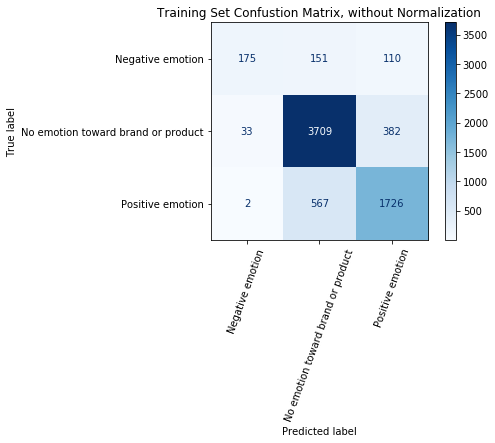

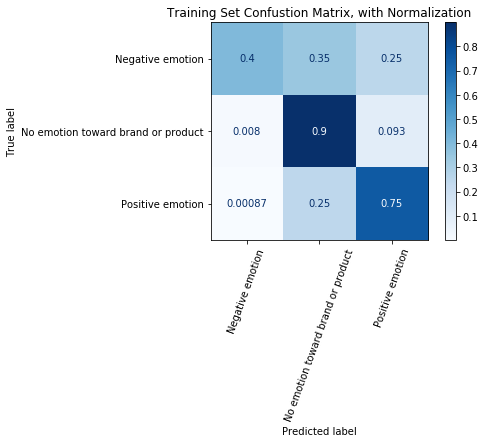

In [15]:
evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_train, 
                                                                 y_train_enc, 
                                                                 le.classes_, 
                                                                 'Training')

Classification Report for Test Set
                                    precision    recall  f1-score   support

                  Negative emotion       0.45      0.08      0.14       109
No emotion toward brand or product       0.74      0.78      0.76      1031
                  Positive emotion       0.58      0.61      0.60       574

                          accuracy                           0.68      1714
                         macro avg       0.59      0.49      0.50      1714
                      weighted avg       0.67      0.68      0.67      1714



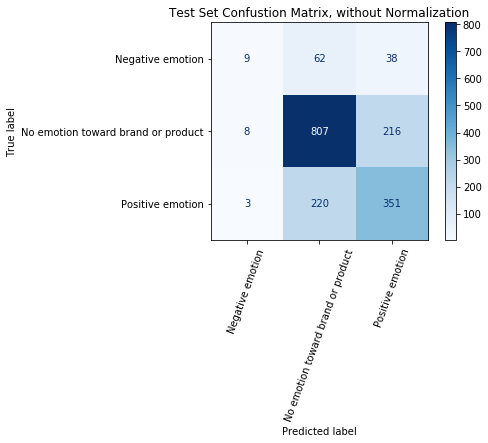

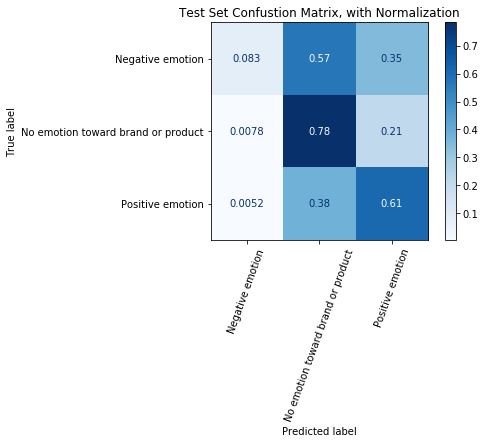

In [16]:
evaluation_functions.confustion_matrix_and_classification_report(pipeline, 
                                                                 X_test, 
                                                                 y_test_enc, 
                                                                 le.classes_,
                                                                 'Test')

In [17]:
lb = LabelBinarizer()
lb.fit(y_test_enc)
y_test_multi = lb.transform(y_test_enc)
y_hat_test_multi = pipeline.predict_proba(X_test)

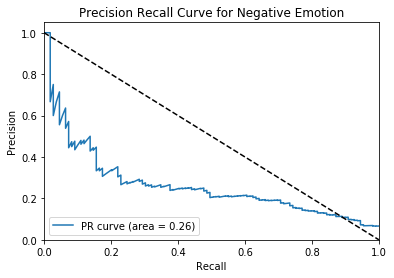

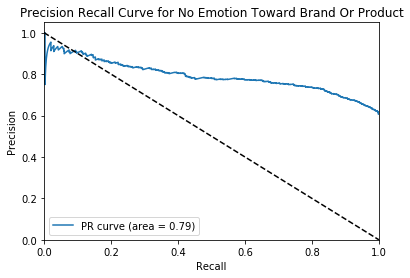

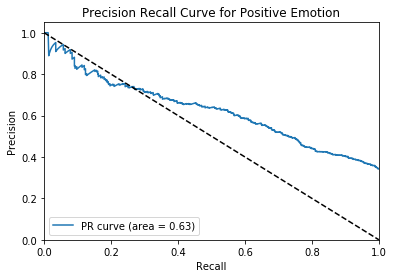

In [18]:
evaluation_functions.pr_curves(y_test_multi, y_hat_test_multi, le.classes_)

# Summary

The accuracy for the model is 68% on the test set while being a significantly higher 82% on the training set.  The 14% difference tells me that the model is overfit on the training data.  Even so, 68% accuracy is still much better than random guessing which should give an accuracy of about 33%.

The data is highly imbalanced and the model did much better on the majority class than the two minority classes with class with the least representation doing the worst.  
* The Negative Emotion class in the test data has an F1 score of only 0.14, Positive has 0.60 and Neutral has 0.76
* The PR curves reinforce the unbalanced results with Negative having a PR AUC of 0.26, Positive having 0.63 and Neutral having 0.79

